<a href="https://colab.research.google.com/github/JulioBrasil1/knn_iris/blob/main/knn_iris1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

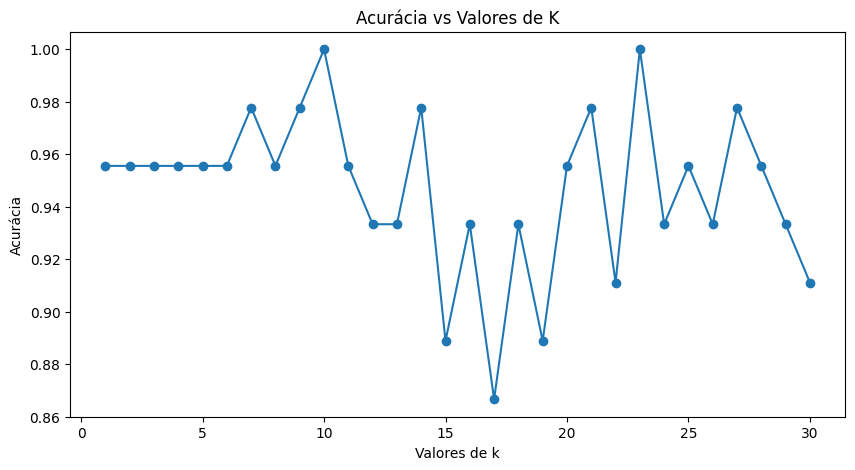

Melhor valor de k: 13
Métricas para o melhor k= 13
Acurácia média:  0.9666666666666668
Precisão:  0.9665084545629433
Recall:  0.9665472458575906
F1 Score:  0.9665270613347131


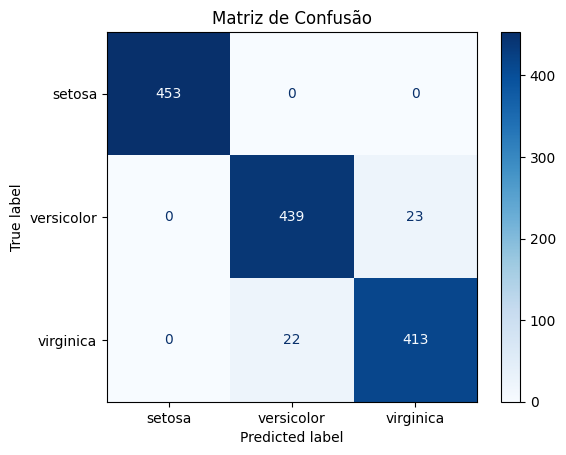

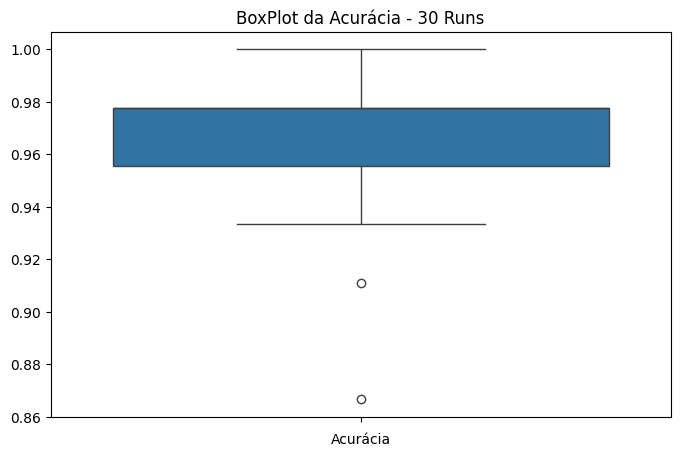

Min: 0.8666666666666667
Max: 1.0
Média: 0.9666666666666668
Desvio padrão da Acurácia: 0.027962349760262024


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay

import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results[['param_n_neighbors', 'mean_test_score', 'std_test_score']].head()


iris = load_iris()
x = iris.data
y = iris.target

accuracies = []
k_values = range(1, 31)
for k in k_values:
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
  #shuffle=True para alterar a ordem das classes e random_state fixa sempre a mesma divisão entre treino e teste.
  #Mas não são necessários
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train, y_train)
  acc = model.score(x_test, y_test)
  accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker = 'o')
plt.xlabel('Valores de k')
plt.ylabel('Acurácia')
plt.title('Acurácia vs Valores de K')
plt.grid
plt.show()

param = {'n_neighbors' : list(range(1, 31))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param, cv=10, n_jobs=-1)
grid.fit(x,y)

print("Melhor valor de k:" , grid.best_params_['n_neighbors'])

k_best = grid.best_params_['n_neighbors']
accuracies_run = []
y_true_all = []
y_pred_all = []

for i in range(30):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
  model = KNeighborsClassifier(n_neighbors=k_best)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  y_true_all.extend(y_test)
  y_pred_all.extend(y_pred)

  acc = accuracy_score(y_test, y_pred)
  accuracies_run.append(acc)

print("Métricas para o melhor k=", k_best)
print("Acurácia média: ", np.mean(accuracies_run))
print("Precisão: ", precision_score(y_true_all, y_pred_all, average='macro'))
print("Recall: ", recall_score(y_true_all, y_pred_all, average='macro'))
print("F1 Score: ", f1_score(y_true_all, y_pred_all, average='macro'))

cm = confusion_matrix(y_true_all, y_pred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap = 'Blues')
plt.title('Matriz de Confusão')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=accuracies_run)
plt.title('BoxPlot da Acurácia - 30 Runs')
plt.xlabel('Acurácia')
plt.show()

print("Min:", min(accuracies_run))
print("Max:", max(accuracies_run))
print("Média:", np.mean(accuracies_run))
print("Desvio padrão da Acurácia:", np.std(accuracies_run))
